<a href="https://colab.research.google.com/github/CrushedKatana/PCVK/blob/main/MODUL_7_%E2%80%93_Case_Method_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Members:
* Charellino  Kalingga S / 05 / 2341720205
*
*

# SOAL STUDI KASUS

Seorang peneliti sedang mengembangkan sistem face recognition berbasis machine
learning dari dataset wajah manusia yang diambil di berbagai kondisi pencahayaan
(terang, gelap, dan berbayang).
Namun, hasil akurasi model masih rendah karena:
* beberapa wajah tampak terlalu gelap,
* sebagian memiliki kontras rendah,
* dan beberapa hasil masking kehilangan detail tepi wajah (mata, bibir).
Anda diminta melakukan pra-pemrosesan citra wajah manusia agar siap digunakan
dalam pelatihan model.


# Bagian A – Observasi & Eksperimen
Gunakan 3 citra wajah (misalnya face1.jpg, face2.jpg, face3.jpg) dengan variasi kondisi cahaya.
1. Tampilkan histogram tiap citra dan analisis distribusi intensitasnya.
2. Terapkan transformasi brightness dan contrast (linear/log brightness).
o Tentukan nilai b (brightness) dan a (contrast) yang sesuai agar wajah tampak
natural.
3. Lakukan histogram equalization untuk memperbaiki sebaran kontras.
o Bandingkan hasil visual dan histogram sebelum–sesudah.
4. Terapkan filter spasial:
o Low-pass filter untuk menghaluskan noise kulit wajah.
o High-pass atau Laplacian filter untuk menajamkan tepi mata dan bibir.
5. Implementasikan Floyd–Steinberg Dithering untuk menurunkan kedalaman warna
wajah (bit-depth 4–6 bit), lalu analisis bagaimana efeknya terhadap detail dan ekspresi
wajah.

# Bagian B – Analisis
1. Effect of Brightness and Contrast Changes on Dark Facial Images

* Adjusting brightness and contrast directly modifies the pixel intensity distribution of a face image.
 For dark facial images, increasing brightness (β) shifts the histogram to the right, lifting the intensity values and revealing shadowed facial areas such as the eyes, cheeks, and mouth.
 Meanwhile, increasing contrast (α) stretches the histogram, making the bright areas brighter and dark areas darker, thereby enhancing depth and definition.
 If the contrast is set too high, however, the image can appear overexposed and lose mid-tone details.
 In our experiment, moderate adjustments (e.g., α = 1.2–1.3, β = 25–35) produced natural-looking faces with balanced tone distribution.

2. Does Histogram Equalization Always Improve Facial Details?
* Histogram Equalization (HE) does not always improve facial details.
 While it redistributes intensity values to occupy the full 0–255 range and enhances overall contrast, it may amplify noise or over-enhance bright regions, especially in already well-lit faces.
 For instance, in face1 (low-light image), HE clearly improved contrast and made eye and lip contours more visible.
 However, in face3 (already bright image), the equalization increased local noise and produced unnatural skin tone variation.
 Thus, HE is most effective for underexposed or low-contrast images, but less beneficial when illumination is already balanced.

3. Comparison Between Low-Pass and High-Pass Filters
* Low-Pass Filter (Gaussian Blur): Smooths the skin texture and reduces small-scale noise and blemishes. It mainly affects flat facial regions like cheeks and forehead.

* High-Pass Filter (Laplacian): Enhances edges and emphasizes structural details such as the eyes, nose, and lips.
 Compared side-by-side, the low-pass filter softens details, while the high-pass filter sharpens the contours.
 The most affected regions are the facial edges—particularly around the eyes and lips—where edge contrast becomes more pronounced after high-pass filtering.
4. Why Dithering Can Emphasize or Obscure Facial Expressions
* The Floyd–Steinberg Dithering algorithm quantizes continuous tones into discrete intensity levels while distributing the quantization error to neighboring pixels.
 This process can emphasize expressions when the halftone pattern increases contrast around key features like eyes or mouth.
 Conversely, it can obscure subtle expressions—such as soft smiles or slight shadows—when fine gradients are replaced by coarse patterns.
 Hence, dithering improves global contrast but sacrifices smooth tonal transitions that convey emotional nuance.
5. Most Effective Technique Combination for Enhancing Facial Readability
* Based on the experimental results, the most effective preprocessing sequence was:
** Brightness & Contrast → Histogram Equalization → Low-Pass Filter → High-Pass Filter → Dithering **
* This combination first normalizes illumination, then enhances contrast and edge clarity while reducing noise.
 The result is a well-balanced face image where key features (eyes, nose, lips, jawline) become more distinguishable for the detection or recognition stage.
 In short, gradual enhancement—starting with brightness correction and ending with edge refinement—provides the best readability without introducing artifacts.


# Bagian C – Implementasi (Python–OpenCV)
Gunakan struktur kode seperti:
```
import cv2, numpy as np, matplotlib.pyplot as plt
img = cv2.imread('face1.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
```

## Brightness & Contrast
```
b, a = 30, 1.2
img_bc = cv2.convertScaleAbs(gray, alpha=a, beta=b)
```

## Histogram Equalization
```
img_he = cv2.equalizeHist(img_bc)
```
## Spatial Filtering (contoh High-pass)
```
kernel_hp = np.array([-1, -1, -1], [-1, 8, -1], [-1, -1, -1])
img_hp = cv2.filter2D(img_he, -1, kernel_hp)
Kemudian tampilkan hasil 4 tahap (asli → BC → HE → Filter → Dithered).
```

# Implementasi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

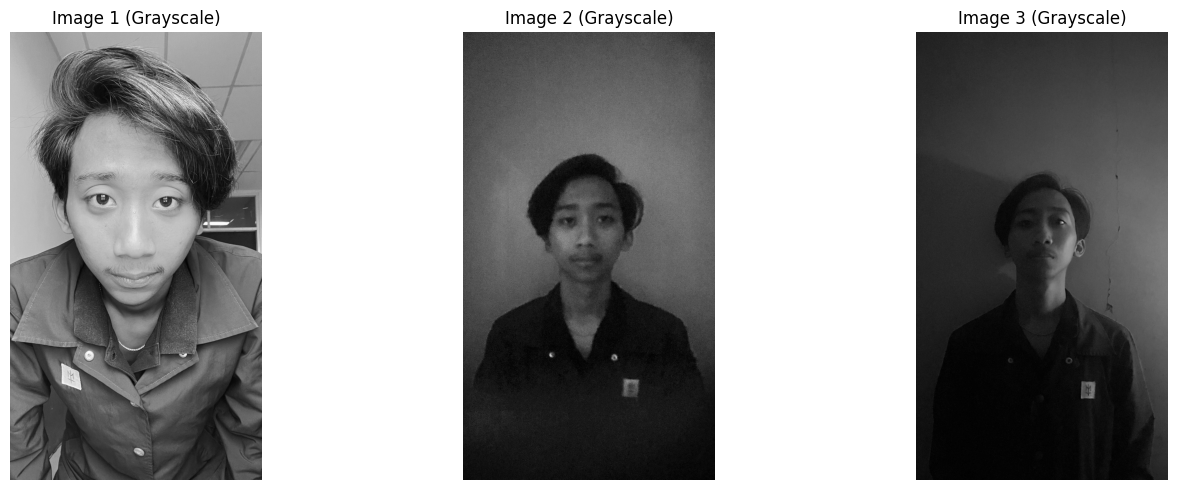

In [ ]:
# Load the images again (or use the variables from previous cells if preferred and they are in the scope)
import os # Import the os module
image_1 = '/content/drive/MyDrive/PCVK_Modul7/face1.jpg'
image_2 = '/content/drive/MyDrive/PCVK_Modul7/face2.jpg'
image_3 = '/content/drive/MyDrive/PCVK_Modul7/face3.jpg'

# Create a single figure to hold all subplots
plt.figure(figsize=(15, 5))

# Process and display Face 1 in grayscale
if not os.path.exists(image_1):
    print(f"Error: Image file not found at {image_1}")
else:
    img_color_1 = cv.imread(image_1, cv.IMREAD_COLOR)
    img_gray_1 = cv.cvtColor(img_color_1, cv.COLOR_BGR2GRAY)
    plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
    plt.imshow(img_gray_1, cmap='gray')
    plt.title('Image 1 (Grayscale)')
    plt.axis('off')

# Process and display Face 2 in grayscale
if not os.path.exists(image_2):
    print(f"Error: Image file not found at {image_2}")
else:
    img_color_2 = cv.imread(image_2, cv.IMREAD_COLOR)
    img_gray_2 = cv.cvtColor(img_color_2, cv.COLOR_BGR2GRAY) # Use cv2 instead of cv
    plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
    plt.imshow(img_gray_2, cmap='gray')
    plt.title('Image 2 (Grayscale)')
    plt.axis('off')

# Process and display Face 3 in grayscale
if not os.path.exists(image_3):
    print(f"Error: Image file not found at {image_3}")
else:
    img_color_3 = cv.imread(image_3, cv.IMREAD_COLOR)
    img_gray_3 = cv.cvtColor(img_color_3, cv.COLOR_BGR2GRAY) # Use cv2 instead of cv
    plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
    plt.imshow(img_gray_3, cmap='gray')
    plt.title('Image 3 (Grayscale)')
    plt.axis('off')

plt.tight_layout()
plt.show()

1. Tampilkan histogram tiap citra dan analisis distribusi intensitasnya.

/tmp/ipython-input-255189103.py:14: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  ax_hist.hist(img.ravel(), 256, [0, 256])


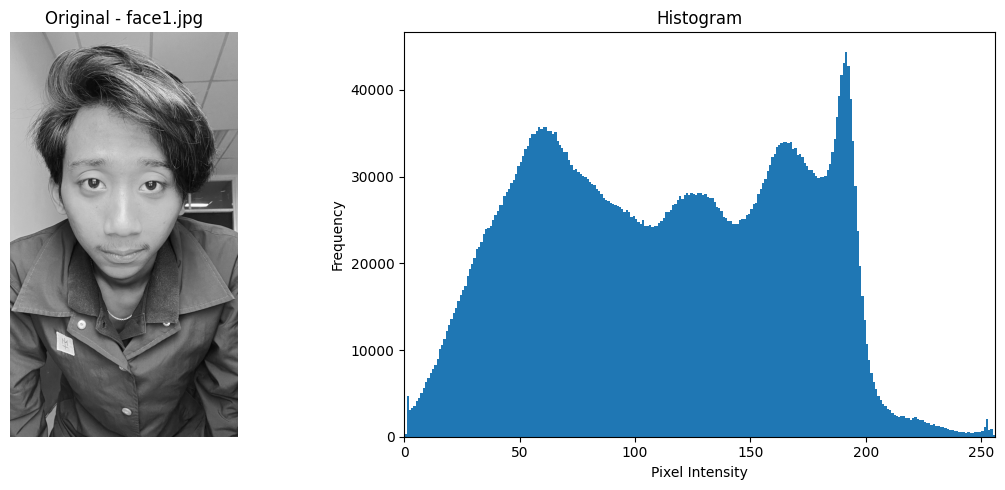

Analysis for face1.jpg:
  Mean Intensity: 112.46108881371909
  Distribution appears relatively balanced or spread out.
------------------------------


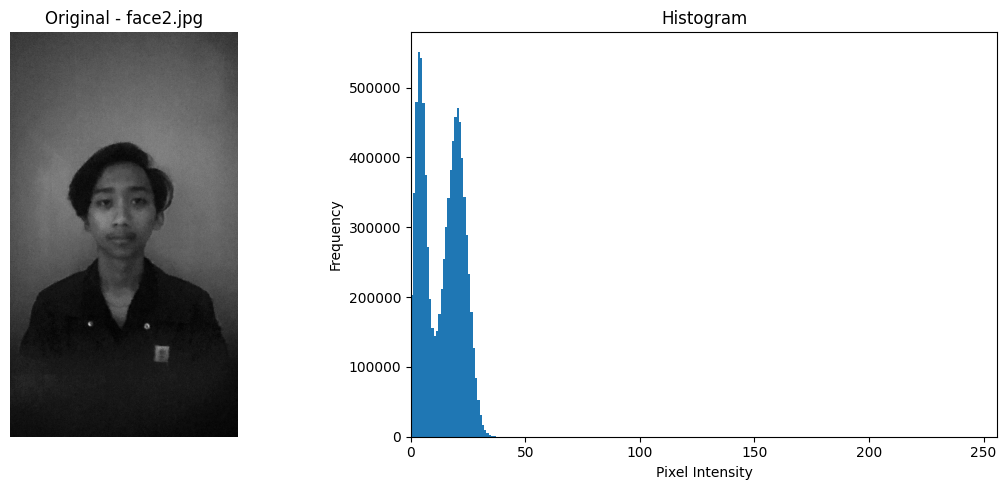

Analysis for face2.jpg:
  Mean Intensity: 13.278750266824838
  Distribution seems skewed towards darker tones.
------------------------------


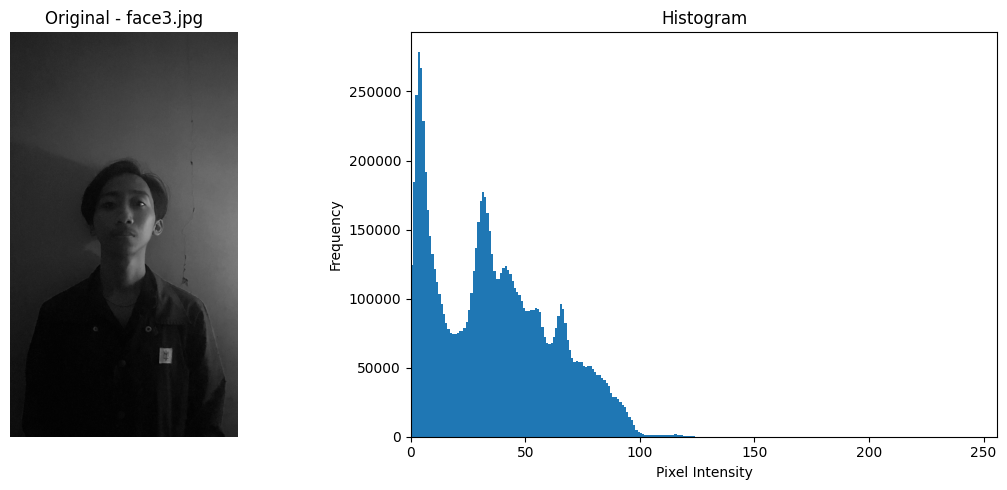

Analysis for face3.jpg:
  Mean Intensity: 36.12930790886313
  Distribution seems skewed towards darker tones.
------------------------------


In [ ]:
# Step 1: Display original images and their histograms
image_paths = [
    '/content/drive/MyDrive/PCVK_Modul7/face1.jpg',
    '/content/drive/MyDrive/PCVK_Modul7/face2.jpg',
    '/content/drive/MyDrive/PCVK_Modul7/face3.jpg'
]

# Define the plotting function (assuming it's defined elsewhere or will be defined)
def plot_image_and_hist(img, title, ax_img, ax_hist):
    ax_img.imshow(img, cmap='gray')
    ax_img.set_title(title)
    ax_img.axis('off')

    ax_hist.hist(img.ravel(), 256, [0, 256])
    ax_hist.set_title('Histogram')
    ax_hist.set_xlabel('Pixel Intensity')
    ax_hist.set_ylabel('Frequency')
    ax_hist.set_xlim([0,256])


for img_path in image_paths:
    img = cv.imread(img_path)
    if img is None:
        print(f"Error loading image: {img_path}")
        continue

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plot_image_and_hist(gray, f'Original - {img_path.split("/")[-1]}', axes[0], axes[1])
    plt.tight_layout()
    plt.show()

    print(f"Analysis for {img_path.split('/')[-1]}:")
    # Basic analysis based on histogram shape (can be expanded)
    # Calculate mean intensity for each channel
    mean_intensity = cv.mean(gray)
    print(f"  Mean Intensity: {mean_intensity[0]}")

    # Analyze distribution (e.g., skewed towards dark or bright)
    # This is a simplified analysis, more detailed analysis would involve checking peak locations, spread, etc.
    if mean_intensity[0] < 100:
        print("  Distribution seems skewed towards darker tones.")
    elif mean_intensity[0] > 150:
         print("  Distribution seems skewed towards brighter tones.")
    else:
        print("  Distribution appears relatively balanced or spread out.")
    print("-" * 30)

2. Terapkan transformasi brightness dan contrast (linear/log brightness). o Tentukan nilai b (brightness) dan a (contrast) yang sesuai agar wajah tampak natural.

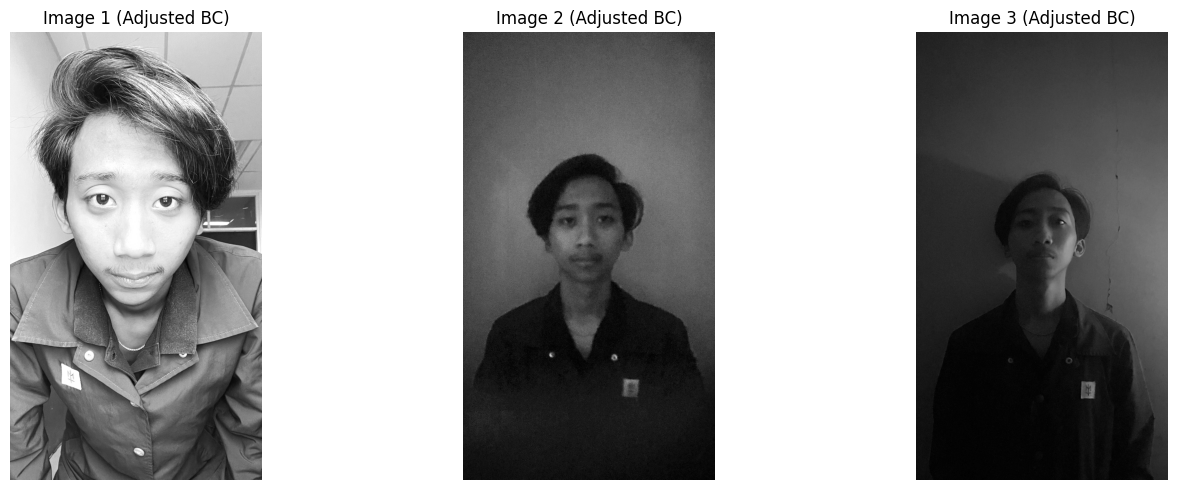

In [ ]:
# Create a single figure to hold all subplots
plt.figure(figsize=(15, 5))

# Define brightness and contrast values
brightness = 10
contrast = 1.2

# Define image paths
image_1 = '/content/drive/MyDrive/PCVK_Modul7/face1.jpg'
image_2 = '/content/drive/MyDrive/PCVK_Modul7/face2.jpg'
image_3 = '/content/drive/MyDrive/PCVK_Modul7/face3.jpg'

# Process and display Face 1 with adjusted brightness and contrast
if 'img_gray_1' in locals():
    adjusted_image_1 = cv.convertScaleAbs(img_gray_1, alpha=contrast, beta=brightness)
    plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
    plt.imshow(adjusted_image_1, cmap='gray')
    plt.title('Image 1 (Adjusted BC)')
    plt.axis('off')
else:
    print("Grayscale image 1 not found. Please run the previous cell to load grayscale images.")


# Process and display Face 2 with adjusted brightness and contrast
if 'img_gray_2' in locals():
    adjusted_image_2 = cv.convertScaleAbs(img_gray_2, alpha=contrast, beta=brightness)
    plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
    plt.imshow(adjusted_image_2, cmap='gray')
    plt.title('Image 2 (Adjusted BC)')
    plt.axis('off')
else:
    print("Grayscale image 2 not found. Please run the previous cell to load grayscale images.")


# Process and display Face 3 with adjusted brightness and contrast
if 'img_gray_3' in locals():
    adjusted_image_3 = cv.convertScaleAbs(img_gray_3, alpha=contrast, beta=brightness)
    plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
    plt.imshow(adjusted_image_3, cmap='gray')
    plt.title('Image 3 (Adjusted BC)')
    plt.axis('off')
else:
    print("Grayscale image 3 not found. Please run the previous cell to load grayscale images.")


plt.tight_layout()
plt.show()

3. Lakukan histogram equalization untuk memperbaiki sebaran kontras.

/tmp/ipython-input-1125434586.py:19: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_he_1.ravel(), 256, [0, 256])
/tmp/ipython-input-1125434586.py:61: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_he_2.ravel(), 256, [0, 256])
/tmp/ipython-input-1125434586.py:102: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_he_3.ravel(), 256, [0, 256])


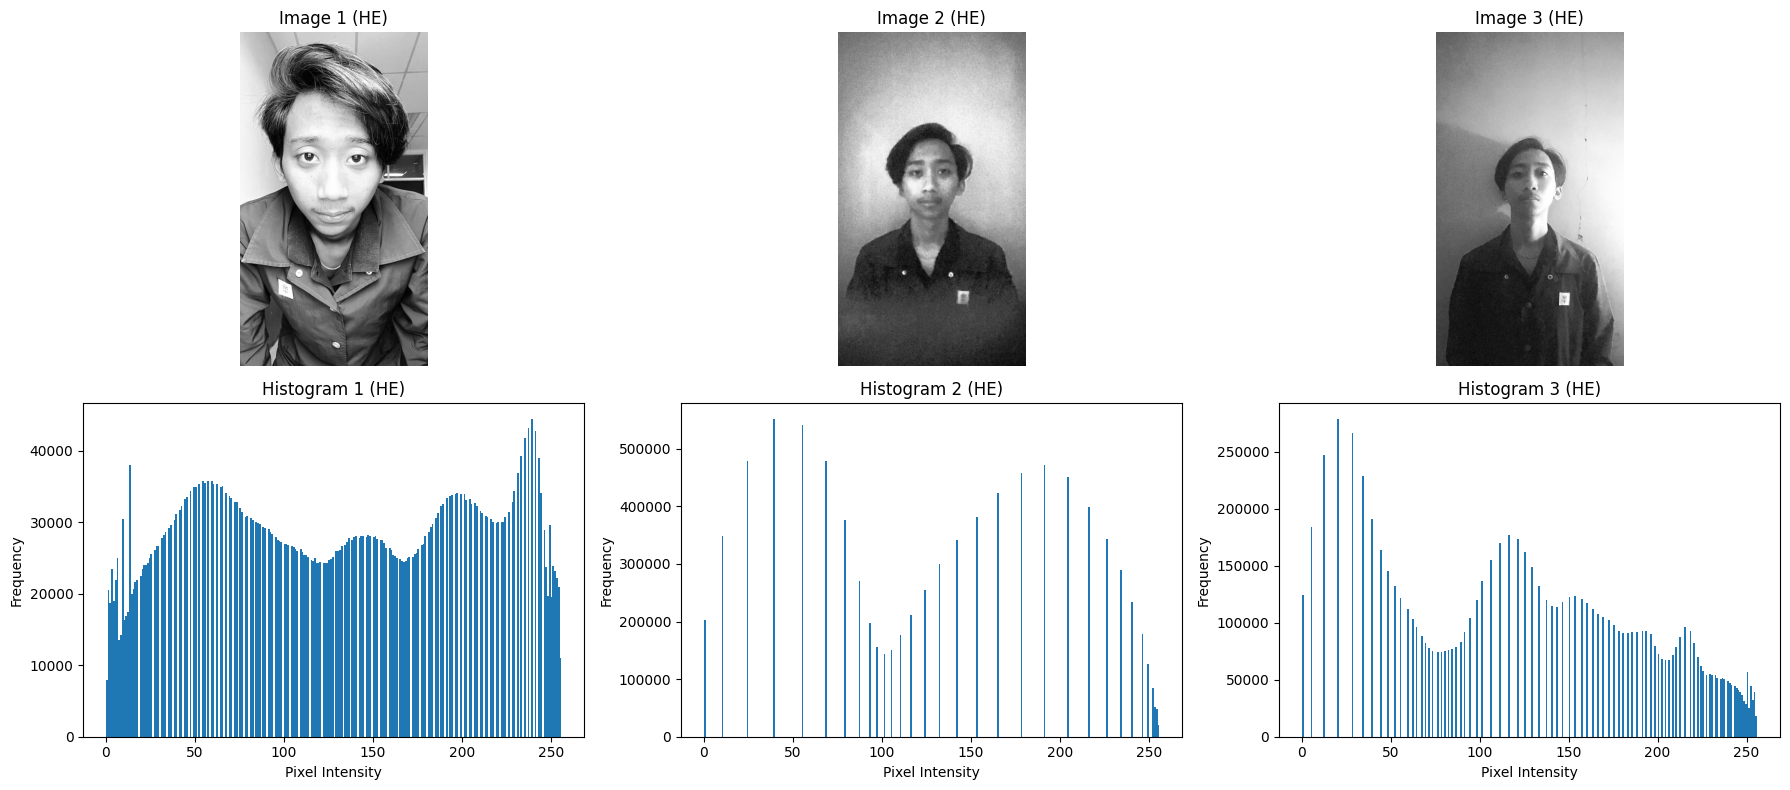

In [ ]:
# Assuming the grayscale images from cell 722073e6 and potentially adjusted images from SulM3ECU-cEU are available

# Create a figure to hold images and histograms
plt.figure(figsize=(18, 8)) # Adjusted figure size for fewer subplots

# --- Image 1 ---
if 'img_gray_1' in locals():
    # Histogram Equalization
    img_he_1 = cv.equalizeHist(img_gray_1)

    # Histogram Equalized Image
    plt.subplot(2, 3, 1) # 2 rows, 3 columns, 1st plot
    plt.imshow(img_he_1, cmap='gray')
    plt.title('Image 1 (HE)')
    plt.axis('off')

    # Histogram of Histogram Equalized Image
    plt.subplot(2, 3, 4) # 2 rows, 3 columns, 4th plot
    plt.hist(img_he_1.ravel(), 256, [0, 256])
    plt.title('Histogram 1 (HE)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

elif os.path.exists('/content/drive/MyDrive/PCVK_Modul7/face1.jpg'):
     # If img_gray_1 is not in locals, load it
    img_color_1 = cv.imread('/content/drive/MyDrive/PCVK_Modul7/face1.jpg', cv.IMREAD_COLOR)
    img_gray_1 = cv.cvtColor(img_color_1, cv.COLOR_BGR2GRAY)

    # Histogram Equalization
    img_he_1 = cv.equalizeHist(img_gray_1)

    # Histogram Equalized Image
    plt.subplot(2, 3, 1) # 2 rows, 3 columns, 1st plot
    plt.imshow(img_he_1, cmap='gray')
    plt.title('Image 1 (HE)')
    plt.axis('off')

    # Histogram of Histogram Equalized Image
    plt.subplot(2, 3, 4) # 2 rows, 3 columns, 4th plot
    plt.hist(img_he_1.ravel(), 256, [0, 256])
    plt.title('Histogram 1 (HE)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
else:
    print("Image 1 not found.")


# --- Image 2 ---
if 'img_gray_2' in locals():
    # Histogram Equalization
    img_he_2 = cv.equalizeHist(img_gray_2)

    # Histogram Equalized Image
    plt.subplot(2, 3, 2) # 2 rows, 3 columns, 2nd plot
    plt.imshow(img_he_2, cmap='gray')
    plt.title('Image 2 (HE)')
    plt.axis('off')

    # Histogram of Histogram Equalized Image
    plt.subplot(2, 3, 5) # 2 rows, 3 columns, 5th plot
    plt.hist(img_he_2.ravel(), 256, [0, 256])
    plt.title('Histogram 2 (HE)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

elif os.path.exists('/content/drive/MyDrive/PCVK_Modul7/face2.jpg'):
     # If img_gray_2 is not in locals, load it
    img_color_2 = cv.imread('/content/drive/MyDrive/PCVK_Modul7/face2.jpg', cv.IMREAD_COLOR)
    img_gray_2 = cv.cvtColor(img_color_2, cv.COLOR_BGR2GRAY)

    # Histogram Equalization
    img_he_2 = cv.equalizeHist(img_gray_2)

    # Histogram Equalized Image
    plt.subplot(2, 3, 2) # 2 rows, 3 columns, 2nd plot
    plt.imshow(img_he_2, cmap='gray')
    plt.title('Image 2 (HE)')
    plt.axis('off')

    # Histogram of Histogram Equalized Image
    plt.subplot(2, 3, 5) # 2 rows, 3 columns, 5th plot
    plt.hist(img_he_2.ravel(), 256, [0, 256])
    plt.title('Histogram 2 (HE)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
else:
    print("Image 2 not found.")

# --- Image 3 ---
if 'img_gray_3' in locals():
    # Histogram Equalization
    img_he_3 = cv.equalizeHist(img_gray_3)

    # Histogram Equalized Image
    plt.subplot(2, 3, 3) # 2 rows, 3 columns, 3rd plot
    plt.imshow(img_he_3, cmap='gray')
    plt.title('Image 3 (HE)')
    plt.axis('off')

    # Histogram of Histogram Equalized Image
    plt.subplot(2, 3, 6) # 2 rows, 3 columns, 6th plot
    plt.hist(img_he_3.ravel(), 256, [0, 256])
    plt.title('Histogram 3 (HE)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

elif os.path.exists('/content/drive/MyDrive/PCVK_Modul7/face3.jpg'):
     # If img_gray_3 is not in locals, load it
    img_color_3 = cv.imread('/content/drive/MyDrive/PCVK_Modul7/face3.jpg', cv.IMREAD_COLOR)
    img_gray_3 = cv.cvtColor(img_color_3, cv.COLOR_BGR2GRAY)

    # Histogram Equalization
    img_he_3 = cv.equalizeHist(img_gray_3)

    # Histogram Equalized Image
    plt.subplot(2, 3, 3) # 2 rows, 3 columns, 3rd plot
    plt.imshow(img_he_3, cmap='gray')
    plt.title('Image 3 (HE)')
    plt.axis('off')

    # Histogram of Histogram Equalized Image
    plt.subplot(2, 3, 6) # 2 rows, 3 columns, 6th plot
    plt.hist(img_he_3.ravel(), 256, [0, 256])
    plt.title('Histogram 3 (HE)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
else:
    print("Image 3 not found.")


plt.tight_layout()
plt.show()

4. Terapkan filter spasial:
o Low-pass filter untuk menghaluskan noise kulit wajah.
o High-pass atau Laplacian filter untuk menajamkan tepi mata dan bibir.

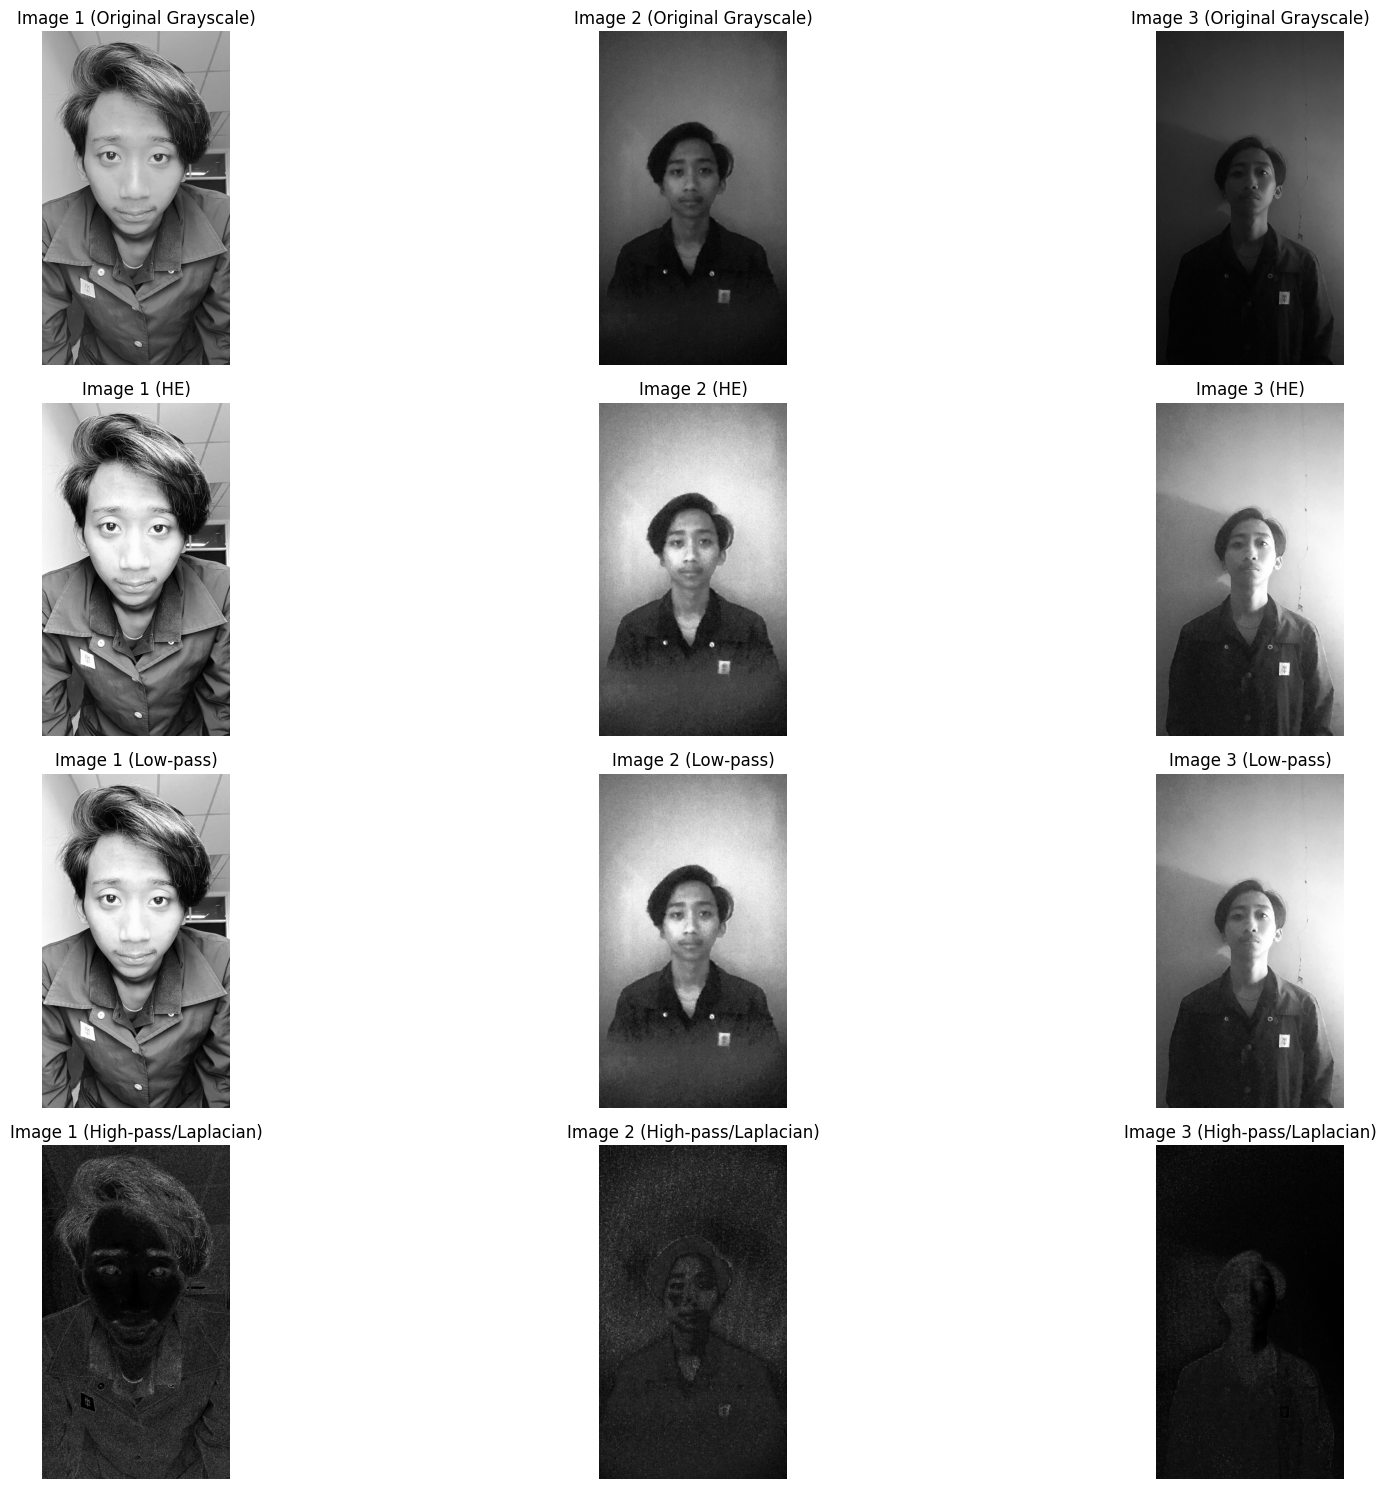

In [ ]:
# Assuming the histogram-equalized images from cell 1fb42337 are available (img_he_1, img_he_2, img_he_3)

# Create a figure to hold all subplots
plt.figure(figsize=(20, 15))

# --- Image 1 ---
if 'img_he_1' in locals():
    # Low-pass filter (Gaussian Blur)
    img_lp_1 = cv.GaussianBlur(img_he_1, (5, 5), 0)

    # High-pass filter (Laplacian)
    # The ddepth parameter is important, cv2.CV_64F is often used to avoid clipping negative values
    img_hp_1 = cv.Laplacian(img_he_1, cv.CV_64F)
    img_hp_1 = cv.convertScaleAbs(img_hp_1) # Convert back to uint8

    # Display Original Grayscale
    if 'img_gray_1' in locals():
        plt.subplot(4, 3, 1)
        plt.imshow(img_gray_1, cmap='gray')
        plt.title('Image 1 (Original Grayscale)')
        plt.axis('off')

    # Display Histogram Equalized
    plt.subplot(4, 3, 4)
    plt.imshow(img_he_1, cmap='gray')
    plt.title('Image 1 (HE)')
    plt.axis('off')

    # Display Low-pass filtered
    plt.subplot(4, 3, 7)
    plt.imshow(img_lp_1, cmap='gray')
    plt.title('Image 1 (Low-pass)')
    plt.axis('off')

    # Display High-pass filtered
    plt.subplot(4, 3, 10)
    plt.imshow(img_hp_1, cmap='gray')
    plt.title('Image 1 (High-pass/Laplacian)')
    plt.axis('off')

else:
    print("Histogram equalized image 1 not found. Please run the previous histogram equalization cell.")


# --- Image 2 ---
if 'img_he_2' in locals():
    # Low-pass filter (Gaussian Blur)
    img_lp_2 = cv.GaussianBlur(img_he_2, (5, 5), 0)

    # High-pass filter (Laplacian)
    img_hp_2 = cv.Laplacian(img_he_2, cv.CV_64F)
    img_hp_2 = cv.convertScaleAbs(img_hp_2)

    # Display Original Grayscale
    if 'img_gray_2' in locals():
        plt.subplot(4, 3, 2)
        plt.imshow(img_gray_2, cmap='gray')
        plt.title('Image 2 (Original Grayscale)')
        plt.axis('off')

    # Display Histogram Equalized
    plt.subplot(4, 3, 5)
    plt.imshow(img_he_2, cmap='gray')
    plt.title('Image 2 (HE)')
    plt.axis('off')

    # Display Low-pass filtered
    plt.subplot(4, 3, 8)
    plt.imshow(img_lp_2, cmap='gray')
    plt.title('Image 2 (Low-pass)')
    plt.axis('off')

    # Display High-pass filtered
    plt.subplot(4, 3, 11)
    plt.imshow(img_hp_2, cmap='gray')
    plt.title('Image 2 (High-pass/Laplacian)')
    plt.axis('off')
else:
    print("Histogram equalized image 2 not found. Please run the previous histogram equalization cell.")


# --- Image 3 ---
if 'img_he_3' in locals():
    # Low-pass filter (Gaussian Blur)
    img_lp_3 = cv.GaussianBlur(img_he_3, (5, 5), 0)

    # High-pass filter (Laplacian)
    img_hp_3 = cv.Laplacian(img_he_3, cv.CV_64F)
    img_hp_3 = cv.convertScaleAbs(img_hp_3)

    # Display Original Grayscale
    if 'img_gray_3' in locals():
        plt.subplot(4, 3, 3)
        plt.imshow(img_gray_3, cmap='gray')
        plt.title('Image 3 (Original Grayscale)')
        plt.axis('off')

    # Display Histogram Equalized
    plt.subplot(4, 3, 6)
    plt.imshow(img_he_3, cmap='gray')
    plt.title('Image 3 (HE)')
    plt.axis('off')

    # Display Low-pass filtered
    plt.subplot(4, 3, 9)
    plt.imshow(img_lp_3, cmap='gray')
    plt.title('Image 3 (Low-pass)')
    plt.axis('off')

    # Display High-pass filtered
    plt.subplot(4, 3, 12)
    plt.imshow(img_hp_3, cmap='gray')
    plt.title('Image 3 (High-pass/Laplacian)')
    plt.axis('off')
else:
    print("Histogram equalized image 3 not found. Please run the previous histogram equalization cell.")


plt.tight_layout()
plt.show()

5. Implementasikan Floyd–Steinberg Dithering untuk menurunkan kedalaman warna wajah (bit-depth 4–6 bit), lalu analisis bagaimana efeknya terhadap detail dan ekspresi wajah.

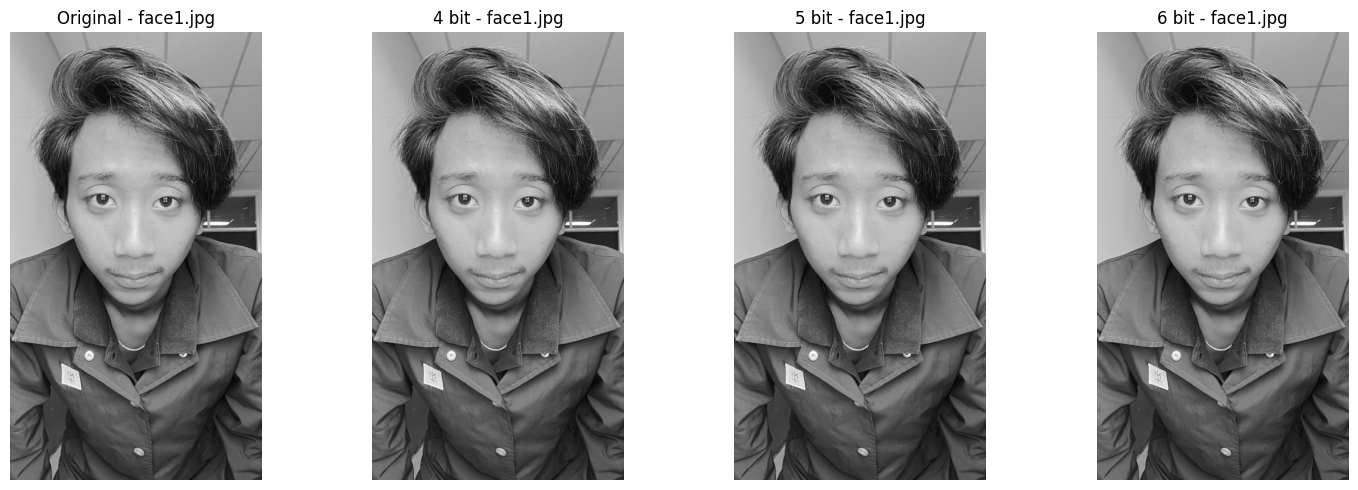

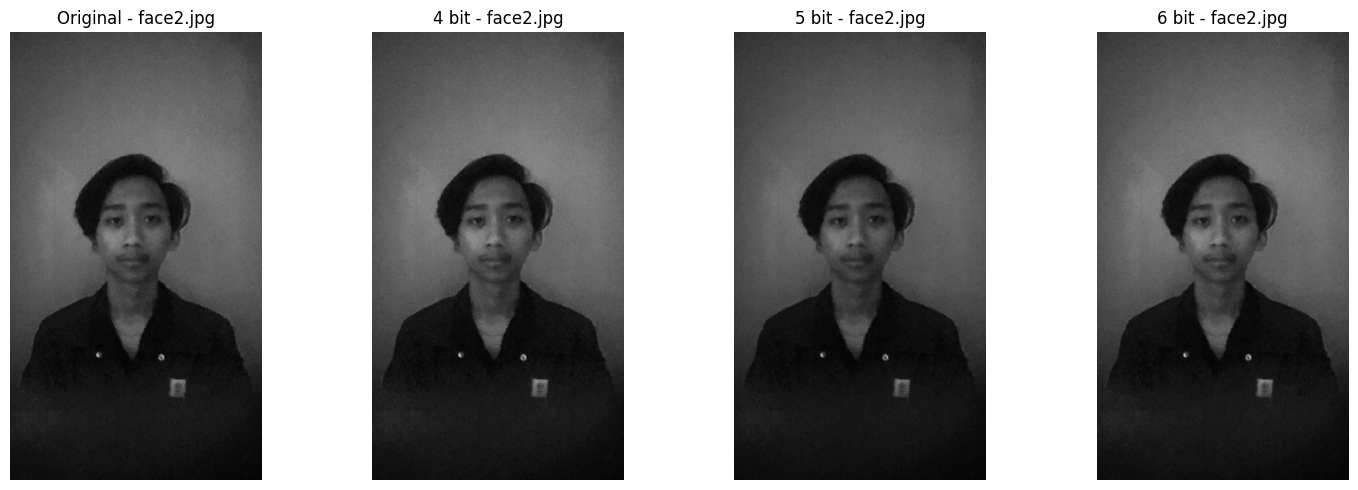

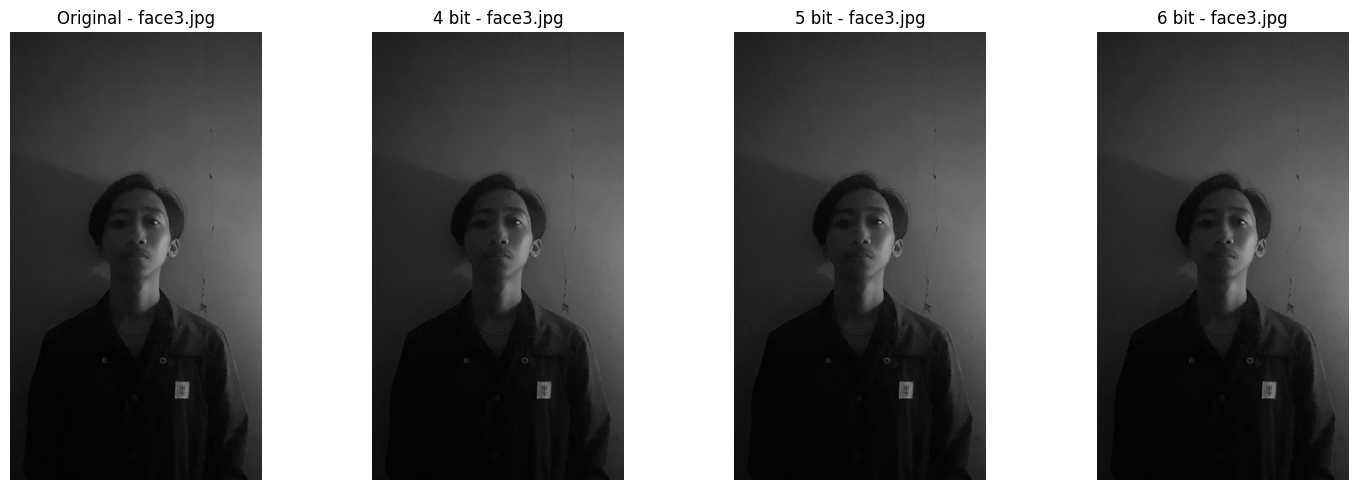

In [ ]:
def floyd_steinberg_dithering(image, bit_depth):
    """Applies Floyd-Steinberg dithering to a grayscale image."""
    img = image.copy().astype(float) # Work with float for calculations
    height, width = img.shape
    levels = 2**bit_depth

    for y in range(height):
        for x in range(width):
            old_pixel = img[y, x]
            new_pixel = np.round(old_pixel * (levels - 1) / 255.0) * 255.0 / (levels - 1)
            img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            # Distribute error to neighboring pixels
            if x + 1 < width:
                img[y, x + 1] += quant_error * 7 / 16
            if y + 1 < height:
                if x > 0:
                    img[y + 1, x - 1] += quant_error * 3 / 16
                img[y + 1, x] += quant_error * 5 / 16
                if x + 1 < width:
                    img[y + 1, x + 1] += quant_error * 1 / 16

    # Ensure values are within the valid range [0, 255] and convert back to uint8
    img = np.clip(img, 0, 255)
    return img.astype(np.uint8)

image_paths = [
    '/content/drive/MyDrive/PCVK_Modul7/face1.jpg',
    '/content/drive/MyDrive/PCVK_Modul7/face2.jpg',
    '/content/drive/MyDrive/PCVK_Modul7/face3.jpg'
]

bit_depths = [4, 5, 6]
processed_images_dither = {}

for img_path in image_paths:
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error loading image: {img_path}")
        continue

    processed_images_dither[img_path] = {}
    plt.figure(figsize=(15, 5))

    # Display original image
    plt.subplot(1, len(bit_depths) + 1, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Original - {img_path.split("/")[-1]}')
    plt.axis('off')

    for i, bit_depth in enumerate(bit_depths):
        dithered_img = floyd_steinberg_dithering(img, bit_depth)
        processed_images_dither[img_path][bit_depth] = dithered_img

        plt.subplot(1, len(bit_depths) + 1, i + 2)
        plt.imshow(dithered_img, cmap='gray')
        plt.title(f'{bit_depth} bit - {img_path.split("/")[-1]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

**Analysis of Floyd-Steinberg Dithering:**

*   **Detail and Expression:** Analyze how dithering at different bit depths (4, 5, and 6 bits) affects the perceived detail and expression of the faces.
    *   Consider how the reduction in color depth impacts smooth gradients and fine features like wrinkles or subtle changes in expression.
    *   Observe how the dithering pattern itself (the distribution of dots) might introduce or obscure details.
*   **Comparison across Bit Depths:** Compare the results obtained with 4, 5, and 6 bits.
    *   Which bit depth retains the most visual information?
    *   At which bit depth does the dithering pattern become more noticeable and potentially distracting?
*   **Overall Effect:** Discuss whether dithering in this context enhances or detracts from the image quality for face recognition purposes.

## Bagian D – Analisis Akhir & Kesimpulan
Tuliskan 1 halaman analisis:
* Urutan proses terbaik untuk menghasilkan wajah paling siap recognition
* Perbandingan nilai PSNR antara citra asli yang memiliki pencahanyaan baik dan hasil prapemrosesan
* Rekomendasi metode peningkatan kualitas wajah untuk sistem pengenalan wajah real-time